In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,KFold

In [3]:
pwd

'C:\\Users\\Tom\\Desktop\\PythonUTN\\ejercicio_octubre'

In [4]:
xy_train=pd.read_csv(r'C:\Users\Tom\Desktop\PythonUTN\ejercicio_octubre\Xy_train.csv')

In [5]:
x_testeo=pd.read_csv(r'C:\Users\Tom\Desktop\PythonUTN\ejercicio_octubre\X_test.csv')

In [6]:
np.shape(xy_train)

(100, 2)

In [7]:
np.shape(x_testeo)

(20, 1)

In [8]:
xy_train.head(3)

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507


In [9]:
x= xy_train[['X']]

In [10]:
y = xy_train['y']

In [11]:
x

,X
0,2.273360
1,3.167583
2,7.973655
3,6.762547
4,3.911096
...,...
95,3.787495
96,2.759471
97,9.661041
98,0.582026


In [12]:
y

0      6.054685
1      4.581428
2      5.392507
3      3.108068
4      4.225744
        ...    
95     5.133706
96     4.308327
97    11.923565
98     1.335725
99     5.641851
Name: y, Length: 100, dtype: float64

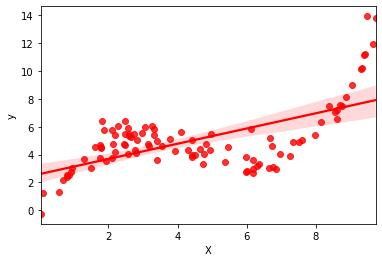

In [13]:
sns.regplot(x,y,color='red',marker='o')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [15]:
x_test.shape

(30, 1)

In [25]:
svrest = SVR(max_iter=45000)
parameters = {'C' : [1,100],
              'kernel':['rbf'],
             'gamma':[0.1, 0.5]}
n_folds = 5
gs = GridSearchCV(svrest, param_grid=parameters,refit=True, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [26]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    0.3s finished


GridSearchCV(estimator=SVR(max_iter=45000), n_jobs=3,
             param_grid={'C': [1, 100], 'gamma': [0.1, 0.5], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [27]:
svr_prediction = gs.best_estimator_.predict(x_test)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)

MSE: 0.680824
R2 score: 0.912133


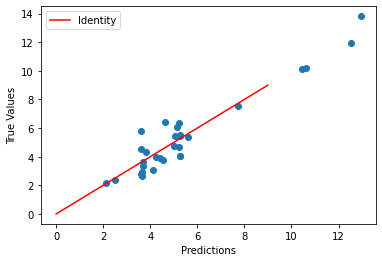

In [28]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,10),np.arange(0,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'MSE: {svr_mse:.6f}')
print(f'R2 score: {svr_r2:.6f}')

In [29]:
svrest.fit(x_train, y_train)

SVR(max_iter=45000)

In [30]:
ypred=svrest.predict(x_testeo)
ypred

array([3.47419412, 3.53492851, 7.31438126, 4.97272703, 5.15004773,
       3.71592977, 6.97924166, 2.14739056, 7.90322123, 5.13881521,
       5.15449869, 3.60600408, 7.94275733, 2.71180407, 4.05546431,
       6.25119778, 3.81683596, 3.43034955, 4.45180865, 3.52310734])